In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

### Camera caliberation with chess board image

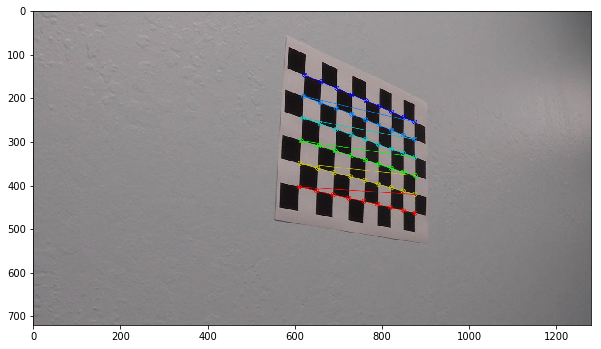

In [2]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)
#cv2.destroyAllWindows()

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [4]:
ret, dist

(1.0298149716172806,
 array([[-0.24688507, -0.02373156, -0.00109831,  0.00035107, -0.00259866]]))

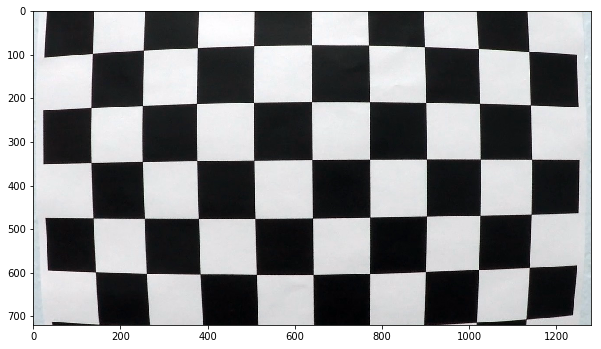

In [5]:
img = cv2.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

In [6]:
def to_gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
def undistort(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

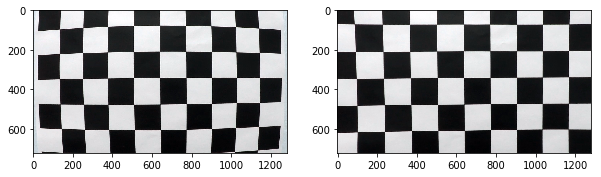

In [7]:
# dst = cv2.undistort(img, mtx, dist, None, mtx)
dst = undistort(img, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(dst)

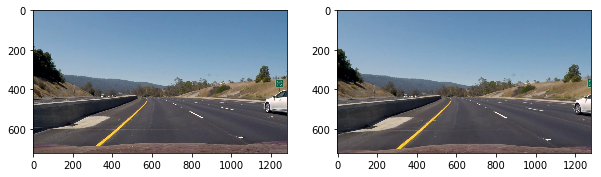

In [196]:
#plt.figure(figsize=(5,10))
f, (ax1, ax2) = plt.subplots(1, 2)
img = cv2.imread('test_images/test18.jpg')
img = bgr2rgb(img)
dst = undistort(img, mtx, dist)
#plt.imshow(dst)
ax1.imshow(img)
ax2.imshow(dst)
plt.show()

### Try different transformation mapping

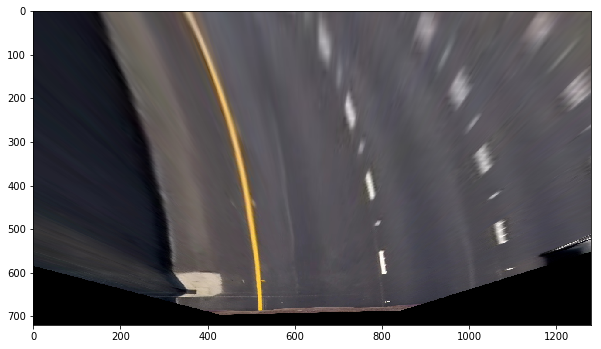

In [197]:
img_size = (img.shape[1], img.shape[0])
from_points = np.float32([[244,687], [1054, 679], [750, 490], [541, 489]])
to_points = np.float32([[492,687], [790, 679], [790, 490], [492, 489]])
M = cv2.getPerspectiveTransform(from_points, to_points)
Minv = cv2.getPerspectiveTransform(to_points, from_points)
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped)

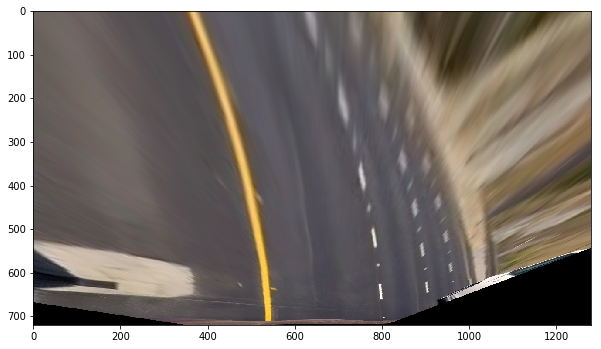

In [198]:
img_size = (img.shape[1], img.shape[0])
from_points = np.float32([[244,687], [1054, 679], [703, 462], [534, 493]])
to_points = np.float32([[492,710], [790, 710], [790, 462], [492, 493]])
M = cv2.getPerspectiveTransform(from_points, to_points)
Minv = cv2.getPerspectiveTransform(to_points, from_points)
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped)

### visualize transformation points on image

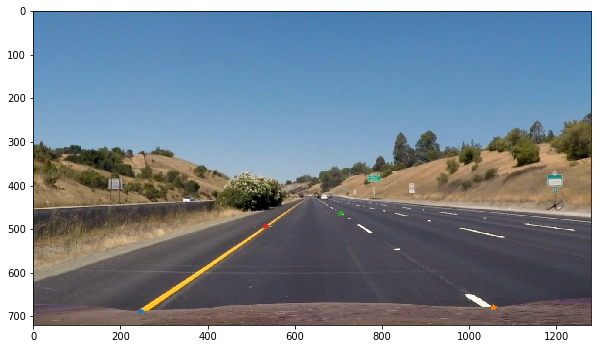

In [194]:
plt.imshow(img)
from_points = np.float32([[244,687], [1054, 679], [703, 462], [531, 493]])
for p in from_points:
    plt.plot(p[0], p[1], "*")

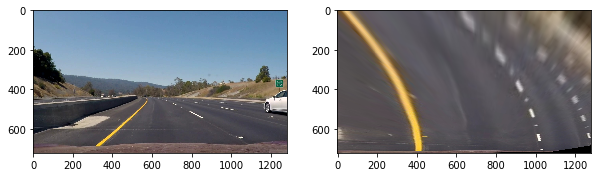

In [199]:
img_size = (img.shape[1], img.shape[0])
from_points = np.float32([[244,687], [1054, 679], [703, 462], [531, 493]])
to_points = np.float32([[300,710], [1000, 710], [1000, 462], [300, 493]])
M = cv2.getPerspectiveTransform(from_points, to_points)
Minv = cv2.getPerspectiveTransform(to_points, from_points)
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
_, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[1].imshow(warped)

### Finally the warp method that transforms the image

In [200]:
def warp(img, M):
    img_size = (img.shape[1], img.shape[0])
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

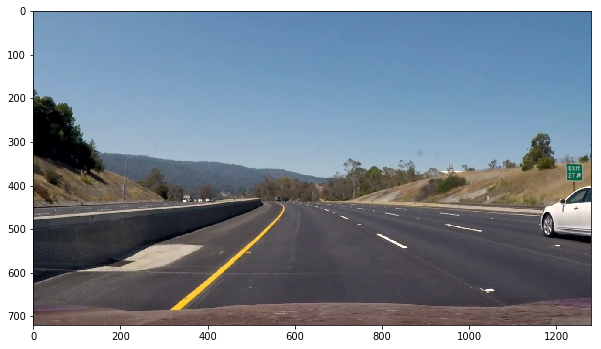

In [201]:
bgrimg = cv2.imread("test_images/test18.jpg")
img = bgr2rgb(bgrimg)
undistorted=undistort(img, mtx, dist)
plt.imshow(img)


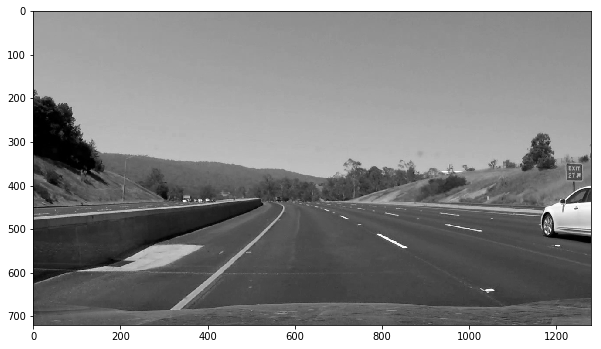

In [202]:
gray = to_gray(img)
plt.imshow(gray, cmap='gray')

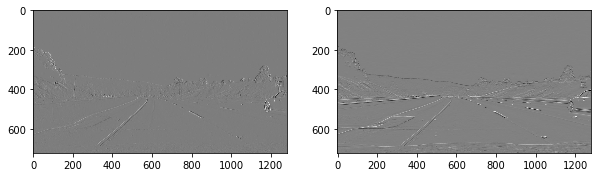

In [131]:
f, (ax1, ax2) = plt.subplots(1, 2)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
ax1.imshow(sobelx, cmap='gray')
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
ax2.imshow(sobely, cmap='gray')

### finding gradient and converting the binary image for processing

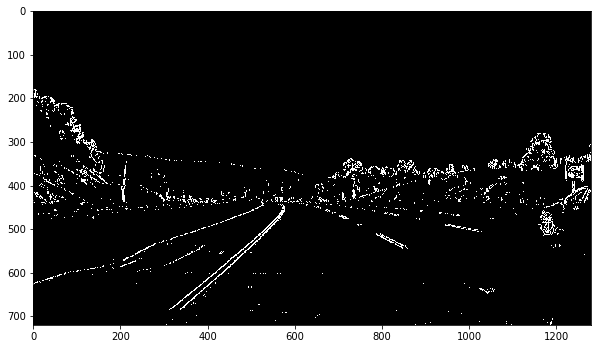

In [132]:
def to_binary(gray):
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

sxbinary = to_binary(gray)
plt.imshow(sxbinary, cmap='gray')

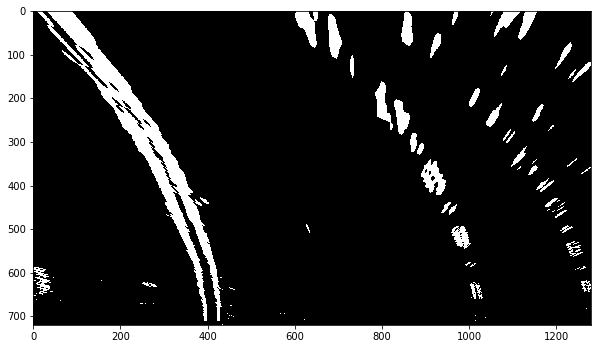

In [134]:
txbinary = warp(sxbinary, M)
plt.imshow(txbinary, cmap='gray')

### Trying out different color spaces and how to leverage that.

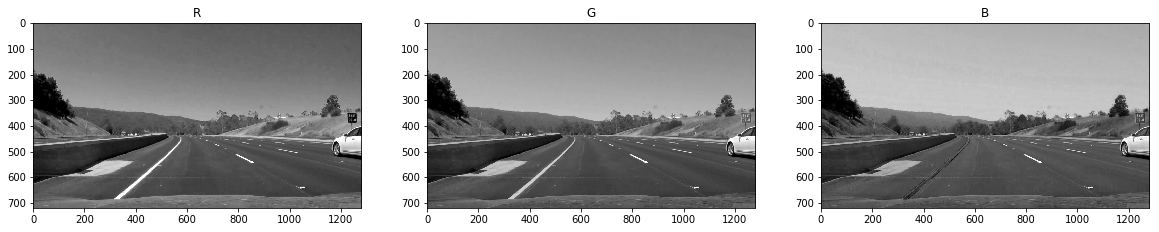

In [135]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
f, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(R, cmap='gray')
ax[0].set_title('R')
ax[1].imshow(G, cmap='gray')
ax[1].set_title('G')
ax[2].imshow(B, cmap='gray')
ax[2].set_title('B')

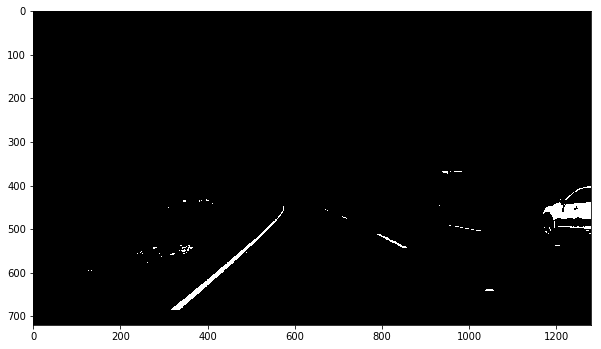

In [136]:
def r_clip(img):
    R = img[:,:,0]
    thresh = (210, 255)
    binary = np.zeros_like(R)
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return binary
plt.imshow(r_clip(img), cmap='gray')

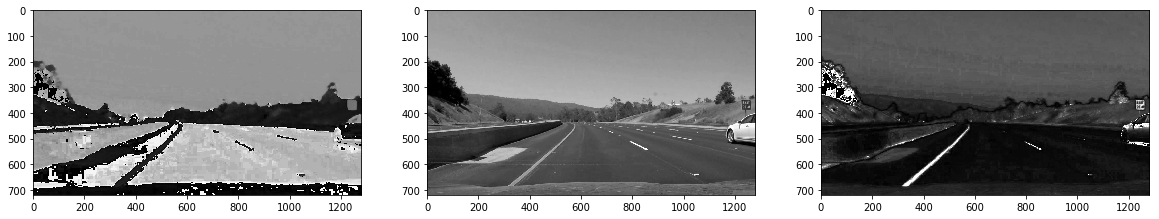

In [137]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
f, ax = plt.subplots(1,3, figsize=(20,20))
plt.figure(figsize=(8, 6)) 
ax[0].imshow(H, cmap='gray')
# ax[0].title('H')
ax[1].imshow(L, cmap='gray')
# ax[1].title('L')
ax[2].imshow(S, cmap='gray')
# ax[2].title('S')

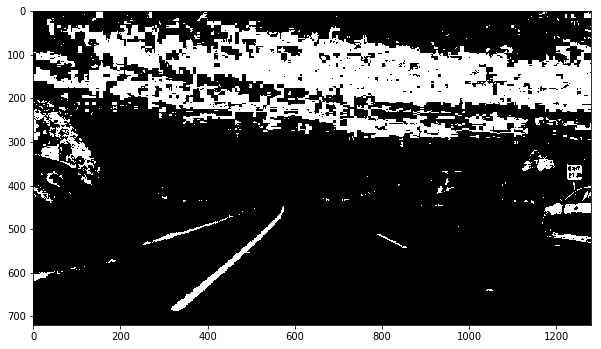

In [138]:
def hls_clip(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
#     L = hls[:,:,1]
    S = hls[:,:,2]
    thresh = (90, 255)
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary

plt.imshow(hls_clip(img), cmap='gray')

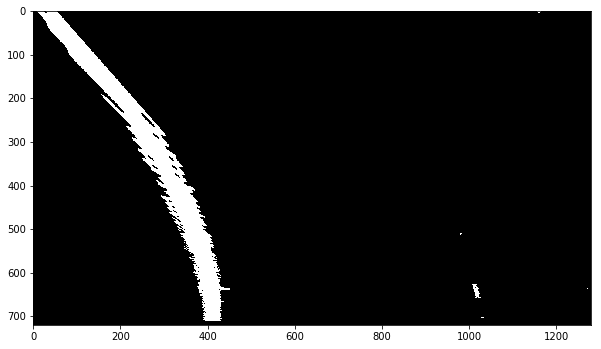

In [139]:
#txbinary = cv2.warpPerspective(hls_clip(img), M, img_size, flags=cv2.INTER_LINEAR)
txbinary= warp(hls_clip(img), M)
plt.imshow(txbinary, cmap='gray')

### a hybrid method to take Saturation and Red channel to find optimal solution

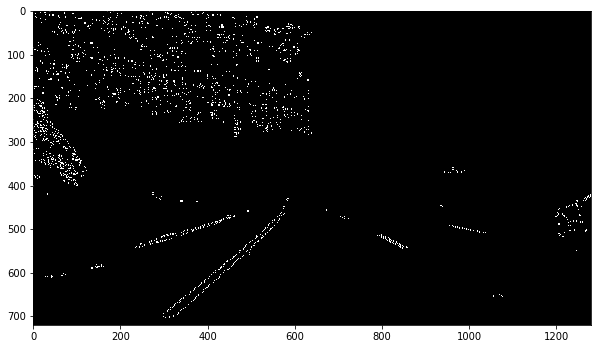

In [203]:
def hybrid_mix(img):
    mid = img.shape[1]//2
    return np.concatenate((hls_clip(img)[:,:mid] , r_clip(img)[:,mid:]), axis=1)
txbinary = to_binary(hybrid_mix(undistorted))
plt.imshow(txbinary, cmap='gray')

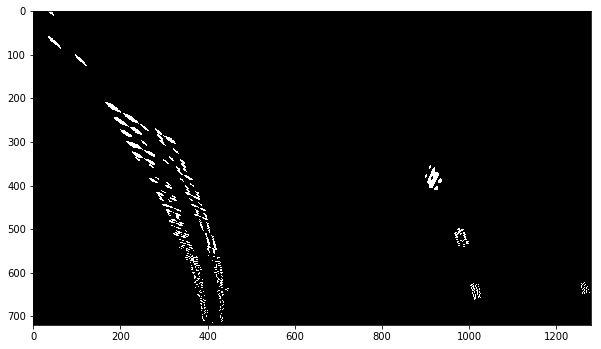

In [204]:
txbinary=warp(txbinary, M)
plt.imshow(txbinary, cmap='gray')

### we will use bottom portion of above image and take histogram to find possible line start point

121


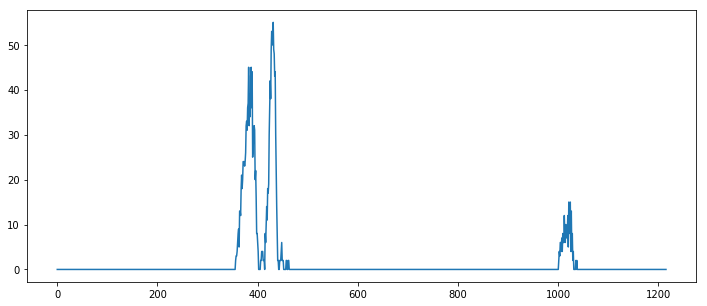

In [205]:
import numpy as np
xmax = txbinary.shape[1]
txbinary=to_binary(txbinary)
histogram1 = np.sum(txbinary[int(txbinary.shape[0]*.8):,:-int(xmax*.05)], axis=0)
plt.figure(figsize=(12,5))
midpoint = np.int(histogram1.shape[0]/2)
xmax = histogram1.shape[0]
print int(.10*xmax)
plt.plot(histogram1)

In [206]:

def fit_poly(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]*.85):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    xmax = binary_warped.shape[1]
    margin_x = .08
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:-int(xmax*margin_x)]) + midpoint
#     print rightx_base
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    ym_per_pix = 1#30/720.0 # meters per pixel in y dimension
    xm_per_pix = 1#3.7/250.0 # meters per pixel in x dimension
    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty * ym_per_pix, leftx * xm_per_pix, 2)
    right_fit = np.polyfit(righty * ym_per_pix, rightx * xm_per_pix, 2)
    return (left_fit, right_fit, out_img, (lefty, leftx, righty, rightx))

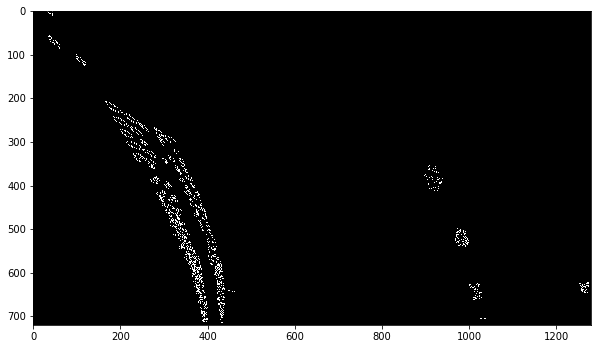

In [207]:
left_fit, right_fit, out_img1, _ = fit_poly(txbinary)
plt.imshow(txbinary, cmap='gray')

In [208]:
def viz(binary_warped, left_fit, right_fit, out_img):
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)

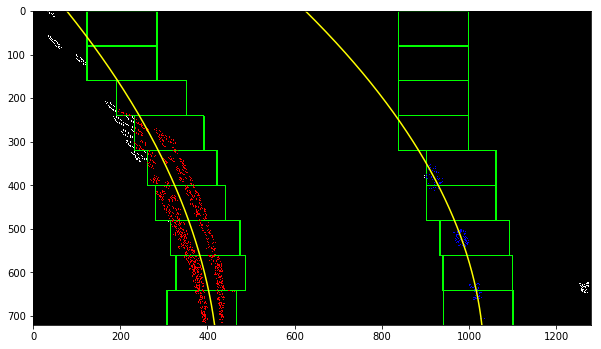

In [209]:
viz(txbinary, left_fit, right_fit, out_img1)

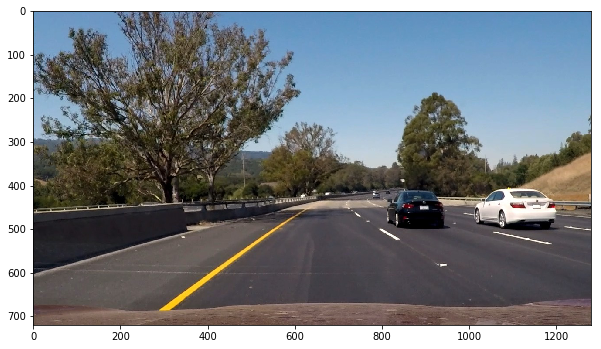

In [148]:
test2 = cv2.imread("test_images/test6.jpg")
plt.imshow(cv2.cvtColor(test2,cv2.COLOR_BGR2RGB))

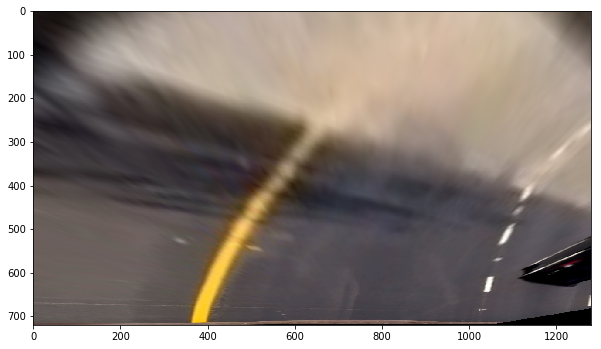

In [32]:
undistorted = undistort(bgr2rgb(test2), mtx, dist)
warped = warp(undistorted, M)
plt.imshow(warped)

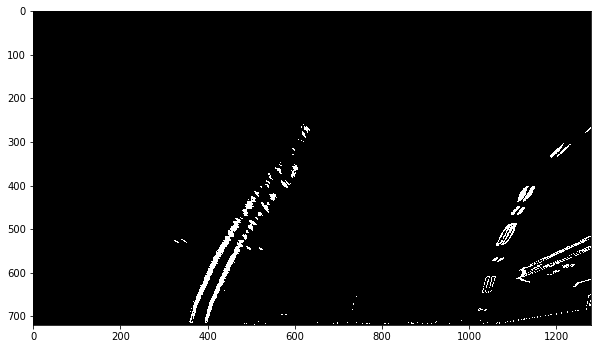

In [33]:
txbinary = to_binary(to_gray(warped))
plt.imshow(txbinary, cmap='gray')

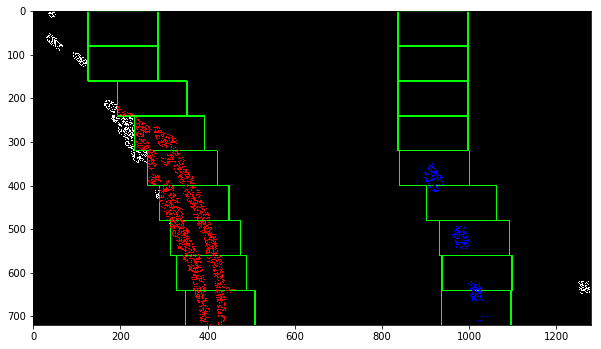

In [167]:
left,right,out, xy = fit_poly(txbinary)
plt.imshow(out)

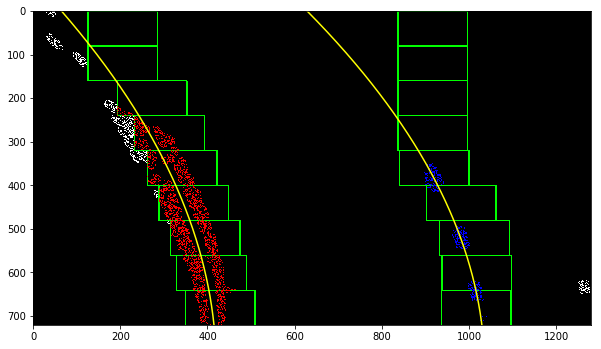

In [168]:
viz(txbinary, left,right, out)
plt.imshow(out)

### Radius of curvature of lane

In [210]:
def radius_curvature(txbinary, xy):
    ym_per_pix = 50/720.0 # meters per pixel in y dimension
    xm_per_pix = 3.7/700.0 # meters per pixel in x dimension

    left_fit_cr = np.polyfit(xy[0]*ym_per_pix, xy[1]*xm_per_pix, 2)
    right_fit_cr = np.polyfit(xy[2]*ym_per_pix, xy[3]*xm_per_pix, 2)

    y_eval = txbinary.shape[0]

    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    return (left_curverad, right_curverad)
print "Radius left, right in meter" , radius_curvature(txbinary, xy)

Radius left, right in meter (861.67871367888029, 760.26402403011014)


In [230]:
def offset(txbinary, xy):
    xm_per_pix = 3.7/700.0
    return ((xy[1][0] + (xy[3][0] - xy[1][0] )/2) - txbinary.shape[1]/2 )* xm_per_pix


In [233]:
print offset(txbinary, xy), 'm right side'

0.259 m right side


In [211]:
left, right

(array([ -5.29465187e-04,   8.67215782e-01,   6.50277211e+01]),
 array([ -6.00116743e-04,   9.89041214e-01,   6.28424497e+02]))

In [237]:
def plot_lane(txbinary, left, right, undistorted):
    ploty = np.linspace(0, txbinary.shape[0]-1, num=txbinary.shape[0])
    left_fitx = left[0]*ploty**2 + left[1]*ploty + left[2]
    right_fitx = right[0]*ploty**2 + right[1]*ploty + right[2]

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(txbinary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    #print pts_left
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    #print pts_right
    pts = np.hstack((pts_left, pts_right))
    #print (pts)
    # Draw the lane onto the warped blank image
    #plt.imshow(color_warp)
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (txbinary.shape[1], txbinary.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    return result

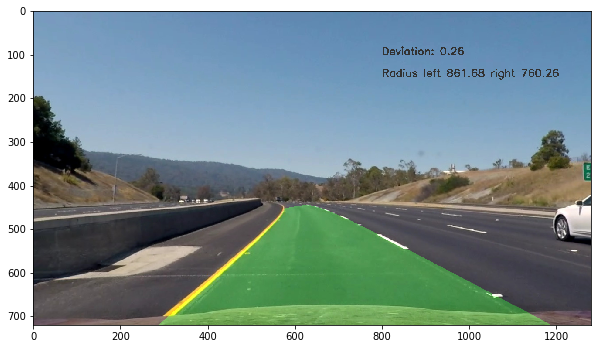

In [248]:
lane = plot_lane(txbinary, left,right, undistorted)
annotate_image(lane, xy)
plt.imshow(lane)


In [247]:
def annotate_image(img, xy):
    deviation = offset(img, xy)
    rad = radius_curvature(img, xy)
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = .8
    fontColor              = (50,50,50)
    lineType               = 2

    cv2.putText(img,"Radius left %.2f right %.2f"%rad, 
        (800,150), #bottom left
        font, 
        fontScale,
        fontColor,
        lineType)
    
    cv2.putText(img,"Deviation: %0.2f"%deviation, 
        (800,100), 
        font, 
        fontScale,
        fontColor,
        lineType)

In [255]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        self.coefs = []
    def add(self, coef, rad):
        if (self.radius_of_curvature is None ):
            self.radius_of_curvature = rad
        if (self.line_base_pos is None):
            self.line_base_pos = coef[2]
        if (self.radius_of_curvature/10.0 < rad and rad < self.radius_of_curvature*10 and \
            np.abs(self.line_base_pos - coef[2])/self.line_base_pos<.2 ):
            self.radius_of_curvature = rad
            self.line_base_pos = coef[2]
            self.coefs.append(coef)

    def current_coef(self):
        return np.mean(self.coefs[-3:], axis=0)
#         return self.coefs[-1]
        
lline = Line()
rline = Line()
rads = []
lcoefs = []
rcoefs = []
def process_imagev2(img):
    try:
        global lline, rline
        undistorted = undistort(img, mtx, dist)
        hls_part = hybrid_mix(undistorted)
        txbinary = to_binary(hls_part )
        warpedbinary = warp(txbinary, M)
        left1,right1,out, xy = fit_poly(warpedbinary)
        rad = radius_curvature(warpedbinary, xy)
#         if (lline.radius_of_curvature is None or (rad[0]/rad[1] < 10 and rad[0]/rad[1]>0.1)):
        if (left1[0] <0) == (right1[0]<0):
            lline.add(left1, rad[0])
            rline.add(right1, rad[1])
            rads.append(rad)
            lcoefs.append(left1)
            rcoefs.append(right1)
        im = plot_lane(txbinary, left1, rline.current_coef(), undistorted)
        annotate_image(im, xy)
        return im
    except Exception as e:
        print e.message
    return img

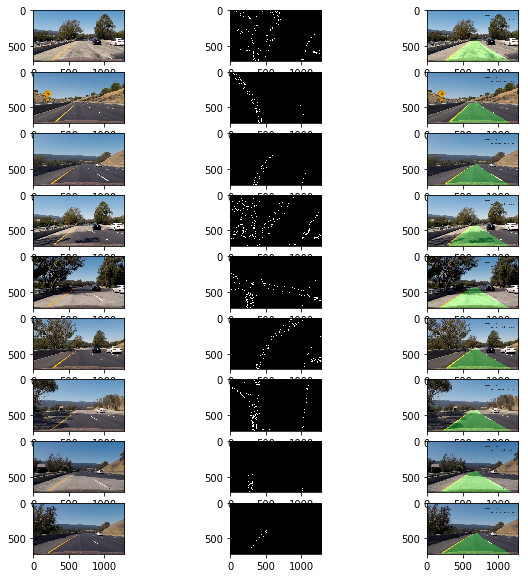

In [253]:
f, p = plt.subplots(9,3)
plt.figure(figsize=(18, 10))
for im in range(1,10):
    test2 = cv2.imread("test_images/test%s.jpg"%im)
    #plt.imshow(cv2.cvtColor(test2,cv2.COLOR_BGR2RGB))
    undistorted = undistort(bgr2rgb(test2), mtx, dist)
    p[im-1][0].imshow(undistorted)
    warped = warp(undistorted, M)
    #plt.imshow(warped)
    hls_part = hls_clip(warped)
    r_part = r_clip(warped)
    txbinary = to_binary(hls_part +r_part)
#     txbinary = to_binary(to_gray(warped))
    p[im-1][1].imshow(txbinary, cmap='gray')
    left1,right1,out, xy = fit_poly(txbinary)
    #print left1
    p[im-1][2].imshow(process_imagev2(bgr2rgb(test2)))
plt.show()

In [42]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

### Verify coefficients and radius of curvature to determine reset condition.

In [183]:
r = [(rads[i][0]/rads[i][1]) for i in range(len(rcoefs))]
print min(r)
print max(r)
r  = [rcoefs[i][2] for i in range(len(rcoefs))]
#plt.plot(r)
np.mean(rcoefs[-3:], axis=0)


0.000770504751893
323.909429662


array([  2.05117359e-04,  -3.20910677e-01,   1.16730529e+03])

In [173]:
for i in range(len(rcoefs)):
    print i, rads[i], (rads[i][0]/rads[i][1]), rcoefs[i]

In [256]:
white_output = 'output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
# white_clip = clip1.subclip(2,7).fl_image(process_imagev2) #NOTE: this function expects color images!!
white_clip = clip1.fl_image(process_imagev2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|█████████▉| 1260/1261 [02:31<00:00,  7.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 

CPU times: user 2min 29s, sys: 31.6 s, total: 3min
Wall time: 2min 32s


In [128]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))